# THE SPARK FOUNDATION (Data Science & Business Analytics)

# TASK-1: Prediction using Supervised ML

# Subhradeep Guha

Dataset: http://bit.ly/w-data

# Importing the liabries and reading dataset

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [129]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [130]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [131]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking null values

In [133]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data visualization of the above dataset

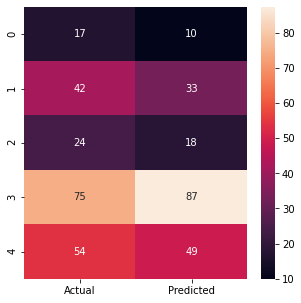

In [152]:
fig,ax = plt.subplots(figsize=(5,5))  
ax=sns.heatmap(df,annot=True)

C:\Users\guhasubx\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

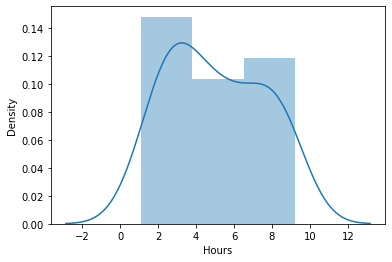

In [135]:
sns.distplot(df['Hours'])

C:\Users\guhasubx\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

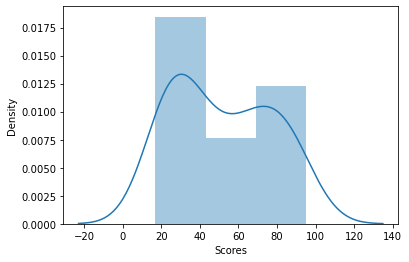

In [136]:
sns.distplot(df['Scores'])

In [137]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

# Splitting the data by using Scikit-Learn's built-in train_test_split() method

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2,random_state=1)

In [139]:
print(X_train)

[[7.7]
 [6.1]
 [7.4]
 [3.5]
 [3.2]
 [2.7]
 [9.2]
 [5.5]
 [3.8]
 [5.1]
 [2.5]
 [2.5]
 [8.9]
 [7.8]
 [6.9]
 [2.7]
 [8.3]
 [4.5]
 [5.9]
 [1.5]]


In [140]:
print(Y_train)

[85 67 69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20]


In [141]:
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [142]:
print(Y_test)

[17 42 24 75 54]


# Plotting the Regression Line

C:\Users\guhasubx\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

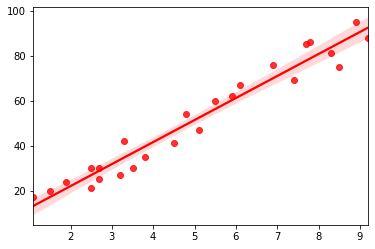

In [143]:
sns.regplot(X,Y,color='red')

C:\Users\guhasubx\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

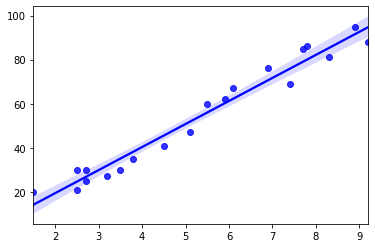

In [144]:
sns.regplot(X_train,Y_train,color='blue')

C:\Users\guhasubx\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

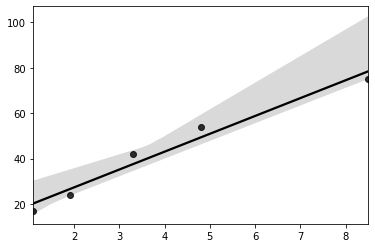

In [145]:
sns.regplot(X_test,Y_test,color='black')

# Training the algorithm

In [146]:
from sklearn.linear_model import LinearRegression
Regressor= LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression()

# Making the predictions

In [147]:
Y_pred=Regressor.predict(X_test)

In [148]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [149]:
hours = 9.25
own_pred = Regressor.predict([[hours]])
print("If you study for {} hours then you will score {} % in exam".format(hr,own_pred))

If you study for 9.25 hours then you will score [95.22829438] % in exam


# Evaluating the model

In [150]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 7.882398086270432
